In [4]:
#imports
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [70]:
csv_files = [
    "convertcsv 1-100.csv",
    "convertcsv 101-140.csv"
]
dataframes = [pd.read_csv(file) for file in csv_files]
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)
combined_df.head()

,Unnamed: 0,Inhibitor,Mol._weight,SMILES,Metal,Alloy,Time_h,Temperature_K,pH,Inhib_Concentrat_M,Salt_Concentrat_M,Synergistic_Inhib_type,Synergistic_Inhib_M,Methodology,Reference,Efficiency
0,1,"1,2,4-Triazole",69.07,c1ncn[nH]1,Al,AA2024,24.0,298,10.0,0.001,0.1,NaN,0,Image processing,"Winkler, Corrosion Science 106 (2016) 229–235",90.0
1,2,"1,2,4-Triazole-3-thiol",101.13,Sc1n[nH]cn1,Al,AA2024,24.0,298,4.0,0.001,0.1,NaN,0,Image processing,"Winkler, Corrosion Science 106 (2016) 229–235",90.0
2,3,2-Mercaptoacetic acid,92.12,OC(=O)CS,Al,AA2024,672.0,298,7.0,0.001,0.1,NaN,0,Weight loss,"Harvey, Corrosion Science 53 (2011) 2184–2190",96.0
3,4,2-Mercaptobenzimidazole,150.20,Sc1nc2c([nH]1)cccc2,Al,AA2024,672.0,298,7.0,0.001,0.1,NaN,0,Weight loss,"Harvey, Corrosion Science 53 (2011) 2184–2190",90.0
4,5,"2-Mercaptobenzothiazole / MBT / 1,3-Benzothiaz...",167.25,S=c1sc2c([nH]1)cccc2,Al,AA2024,672.0,298,7.0,0.001,0.1,NaN,0,Weight loss,"Harvey, Corrosion Science 53 (2011) 2184–2190",95.0


In [92]:
# gather data for plot
# here temperature
temperature = combined_df["Temperature_K"]
efficiency = combined_df["Efficiency"]
Mol_weight = combined_df["Mol._weight"]

In [66]:
# Define the range
# Temperature automotive:	-30°C - 70°C	243K - 343K
# Temperature avionics:	-50°C - 120°C	223K - 393K

# Filter for avionic_dataset
avionic_dataset = combined_df[
    ((combined_df['Temperature_K'] >= 243) & (combined_df['Temperature_K'] <= 343))
]

# Filter for automotive_dataset
automotive_dataset = combined_df[
    ((combined_df['Temperature_K'] >= 223) & (combined_df['Temperature_K'] <= 393))
]
print(avionic_dataset.shape[0], automotive_dataset.shape[0])

140 140


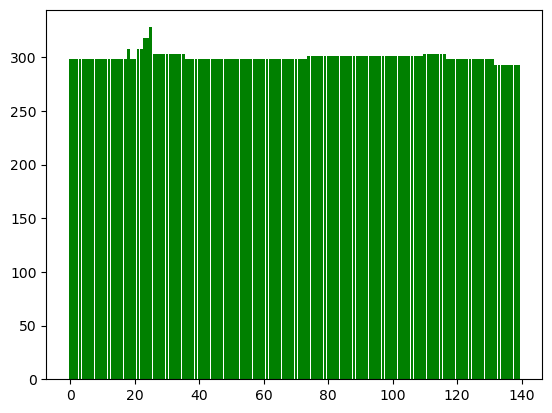

In [68]:
#plot - temperature
index = np.arange(len(temperature))
bar_width = 0.9
plt.bar(index, temperature, bar_width,  color="green")
plt.show()

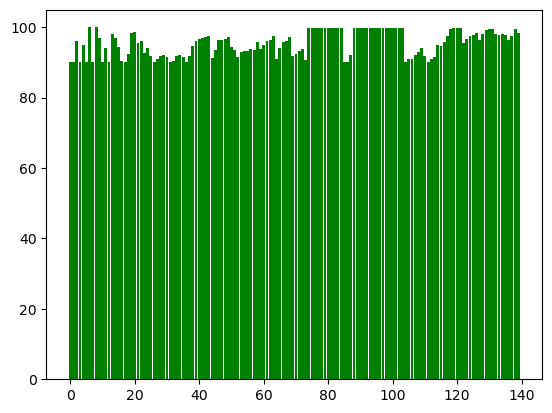

In [16]:
#plot - temperature
index = np.arange(len(efficiency))
bar_width = 0.9
plt.bar(index, efficiency, bar_width,  color="green")
plt.show()

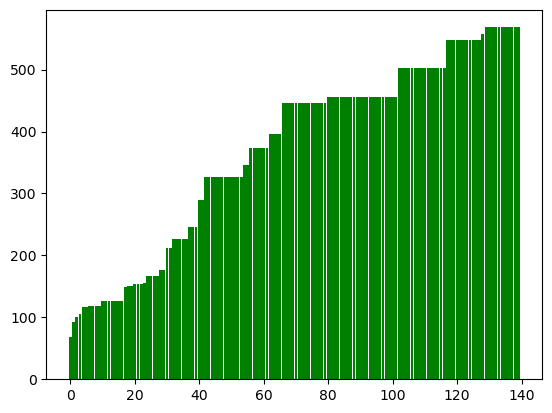

In [90]:
#plot - Mol_weight
Mol_weight = Mol_weight.sort_values()
index = np.arange(len(Mol_weight))
bar_width = 0.9
plt.bar(index, Mol_weight, bar_width,  color="green")
plt.show()

In [94]:
import datamol as dm

In [103]:
avionic_dataset["Mol"] = avionic_dataset["SMILES"].apply(dm.to_mol)